<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/NAEX_Exercise_06_students_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAEX Exercise 06 - student solution
## author: Tereza Fucsiková

In [4]:
list_of_packages <- c("tidyverse","MASS",'FrF2', "metR", "geoR") # "agricolae","nortest","lattice","pwr",
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages

[1] "FrF2"

In [10]:
system("sudo apt-get install libgmp-dev")
install.packages("gmp")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
system("sudo apt-get install libgmp-dev")
install.packages("partitions")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
system("sudo apt-get install libgmp-dev")
install.packages("DoE.base")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: DoE.base

Loading required package: grid

Loading required package: conf.design

Registered S3 method overwritten by 'DoE.base':
  method           from       
  factorize.factor conf.design


Attaching package: ‘DoE.base’


The following objects are masked from ‘package:stats’:

    aov, lm


The following object is masked from ‘package:graphics’:

    plot.design


The following object is masked from ‘package:base’:

    lengths



Attaching package: ‘metR’


The following object is masked from ‘package:grid’:

    as.path


The following object is masked from ‘package:purrr’:

    cross


Warning message:
“no DISPLAY variable so Tk is not available”
--------------------------------------------------------------
 Analysis of Geostatistical Data
 For an Introduction to geoR go to http://www.leg.ufpr.br/geoR
 geoR version 1.9-2 (built on 2022-08-09) is now loaded
---------------

[[1]]
 [1] "MASS"      "lubridate" "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "MASS"      "lubridate" "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "MASS"       
 [6] "lubridate"   "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"       

[[4]]
 [1] "metR"        "FrF2"        "DoE.base"    "conf.design" "grid"       
 [6] "MASS"        "lubridate"   "forcats"     "stringr"     "dplyr"      
[11] "purrr"       "readr"       "tidyr"       "tibble"      "ggplot2"    
[16] "tidyverse"   "stats"       "graphics"    "grDevices"   "utils"      
[21] "datasets"    "methods"     "base"       

[[5]]
 [1] "geoR"        "metR"        "FrF2"        "DoE.base"    "conf.design"
 [6] "grid"        "MASS"        "lubridate"   "forcats"     "stringr"    
[11] "dplyr"       "purrr"       "readr"       "tidyr"       "tibble"     
[16] "ggplot2"     "tidyverse"   "stats"       "graphics"    "grDevices"  
[21] "utils"       "datasets"    "methods"     "base"

## Problem 6.31 + 6.32

from the chapter 6, D. C. Montgomery DAoE - 8. edition.

An experiment was conducted on a chemical process that produces a
polymer. The four factors studied were temperature (A), catalyst
concentration (B), time (C), and pressure (D). Two responses, molecular
weight and viscosity, were observed. The design matrix and response data
are following:

In [14]:
df631 <- read.table("https://raw.githubusercontent.com/francji1/01NAEX/main/data/Problem_6_31.txt",header=TRUE,sep=";")
(df631)

Temperature,Concentration,Time,Pressure,Weight,Viscosity
<int>,<int>,<int>,<dbl>,<int>,<int>
100,4,20,60.0,2400,1400
120,4,20,60.0,2410,1500
100,8,20,60.0,2315,1520
120,8,20,60.0,2510,1630
100,4,30,60.0,2615,1380
120,4,30,60.0,2625,1525
100,8,30,60.0,2400,1500
120,8,30,60.0,2750,1620
100,4,20,75.0,2400,1400


Use only first sixteen measurements, center points will be covered in
the following lesson.

## Tasks:

1.Consider only the molecular weight response. Plot the effect
estimates on a normal probability scale. What effects appear
important?

2.Use an analysis of variance to confirm the results from the first
part.

3.Write down a regression model to predict molecular weight as a
  function of the important variables.
  
4.Analyze the residuals and comment on model adequacy.

5.Repeat parts 1.--4. using the viscosity response.


Use the regression models for molecular weight and viscosity to answer
the following questions.

6.Construct a response surface contour plot
for molecular weight. In what direction would you adjust therocess
variables to increase molecular weight?

7. Construct a response surface
contour plot for viscosity. In what direction would you adjust the
process variables to decrease viscosity?

8. What operating conditions
would you recommend if it was necessary to produce a product with
molecular weight between 2400 and 2500 and the lowest possible
viscosity?

In [15]:
m         <-  FrF2(2^4, 4, replications = 1, randomize = F,factor.names = c("A", "B","C", "D"))
Weight    <- df631[1:16,"Weight"]
Viscosity <- df631[1:16,"Viscosity"]
m_full <-m
m_full         <- add.response(m_full,Weight)
m_full         <- add.response(m_full,Viscosity)


response.names(m_full)
m_full

creating full factorial with 16 runs ...




[1] "Weight"    "Viscosity"

,A,B,C,D,Weight,Viscosity
,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,-1,-1,-1,-1,2400,1400
2,1,-1,-1,-1,2410,1500
3,-1,1,-1,-1,2315,1520
4,1,1,-1,-1,2510,1630
5,-1,-1,1,-1,2615,1380
6,1,-1,1,-1,2625,1525
7,-1,1,1,-1,2400,1500
8,1,1,1,-1,2750,1620
9,-1,-1,-1,1,2400,1400


## Tasks:

1.  Consider only the molecular weight response. Plot the effect
    estimates on a normal probability scale. What effects appear
    important?

In [16]:
m_weight <- m
m_weight <- add.response(m_weight,Weight)

response.names(m_weight)
m_weight

[1] "Weight"

,A,B,C,D,Weight
,<fct>,<fct>,<fct>,<fct>,<int>
1,-1,-1,-1,-1,2400
2,1,-1,-1,-1,2410
3,-1,1,-1,-1,2315
4,1,1,-1,-1,2510
5,-1,-1,1,-1,2615
6,1,-1,1,-1,2625
7,-1,1,1,-1,2400
8,1,1,1,-1,2750
9,-1,-1,-1,1,2400


In [17]:
lm_coeffs_1 <- lm(Weight ~ A * B * C * D - A:B:C:D, data=m_full)
effects_1 <-as.data.frame(2*lm_coeffs_1$coefficients)
names(effects_1)[1] <- 'Effects'
print(effects_1)

            Effects
(Intercept) 5012.50
A1           123.75
B1           -11.25
C1           201.25
D1             6.25
A1:B1        120.00
A1:C1         20.00
B1:C1        -22.50
A1:D1        -17.50
B1:D1          7.50
C1:D1         12.50
A1:B1:C1      16.25
A1:B1:D1     -11.25
A1:C1:D1     -18.75
B1:C1:D1       3.75


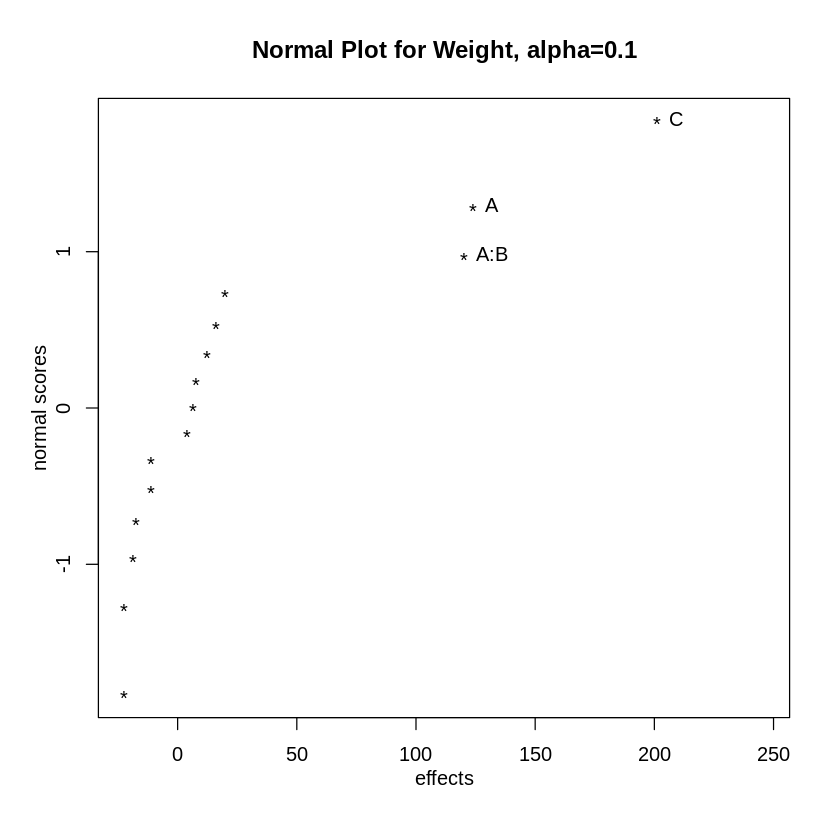

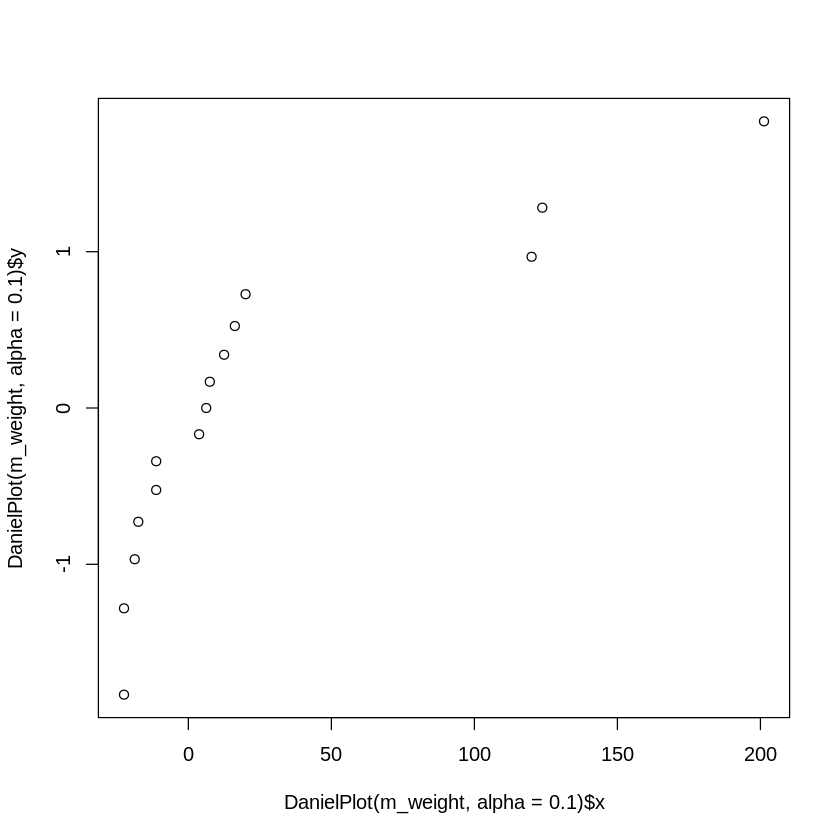

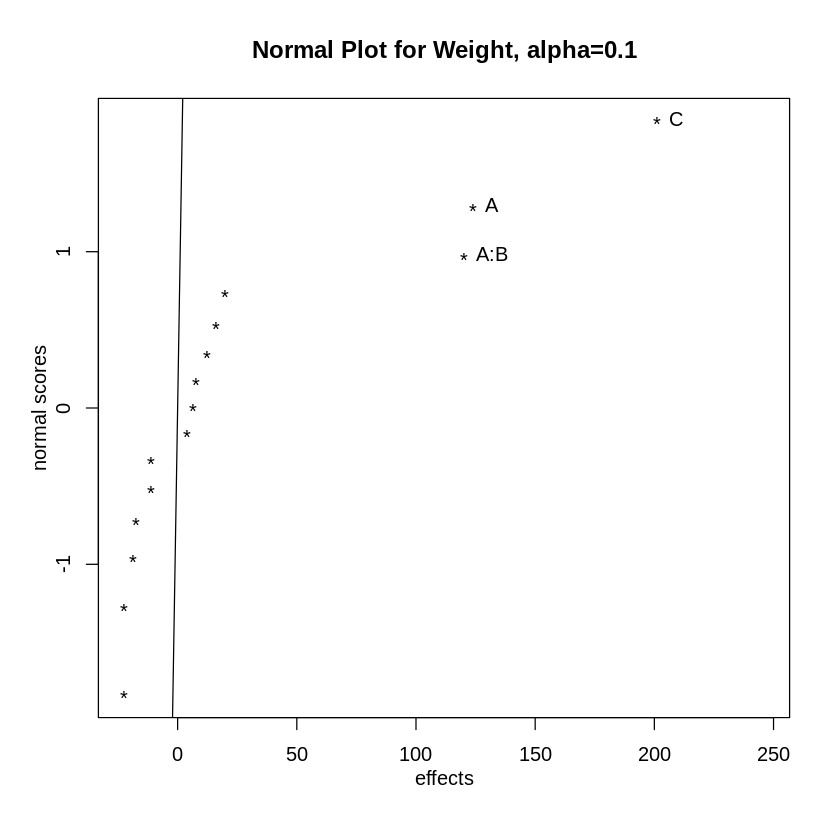

In [18]:
# Daniel plot
qqplot(DanielPlot(m_weight,alpha=0.1)$x,DanielPlot(m_weight, alpha=0.1)$y)
qqline(DanielPlot(m_weight,alpha=0.1)$y)

The interactions A, C and A:B appear to be important.



2.  Use an analysis of variance to confirm the results from the first
    part.

In [19]:
summary(aov(Weight ~ A + C + A:B, data=m_full))

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  61256   61256   61.78 7.72e-06 ***
C            1 162006  162006  163.40 6.06e-08 ***
A:B          2  58106   29053   29.30 3.92e-05 ***
Residuals   11  10906     991                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

It confirms the result from the first part that A, C, AB are
significant.



3.  Write down a regression model to predict molecular weight as a
    function of the important variables.

In [20]:
model_weight_reg <- lm(Weight ~ A + C + A:B, data=m_full)
summary(model_weight_reg)


Call:
lm.default(formula = Weight ~ A + C + A:B, data = m_full)

Residuals:
   Min     1Q Median     3Q    Max 
-79.38 -10.00   1.25  16.88  36.88 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2506.250      7.872 318.378  < 2e-16 ***
A1            61.875      7.872   7.860 7.72e-06 ***
C1           100.625      7.872  12.783 6.06e-08 ***
A-1:B1       -65.625     11.133  -5.895 0.000104 ***
A1:B1         54.375     11.133   4.884 0.000484 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.49 on 11 degrees of freedom
Multiple R-squared:  0.9627,	Adjusted R-squared:  0.9491 
F-statistic: 70.95 on 4 and 11 DF,  p-value: 8.797e-08


As a result: molecular weight = 2506.25 + 61.875\*A + 100.625\*C +
60\*A\*B.



4.  Analyze the residuals and comment on model adequacy.

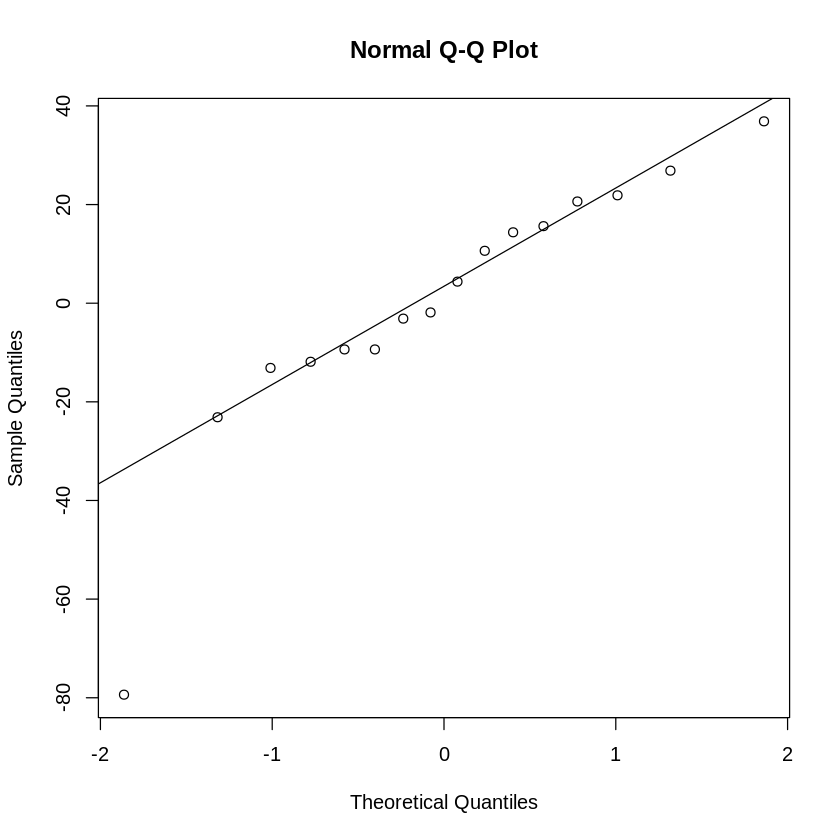

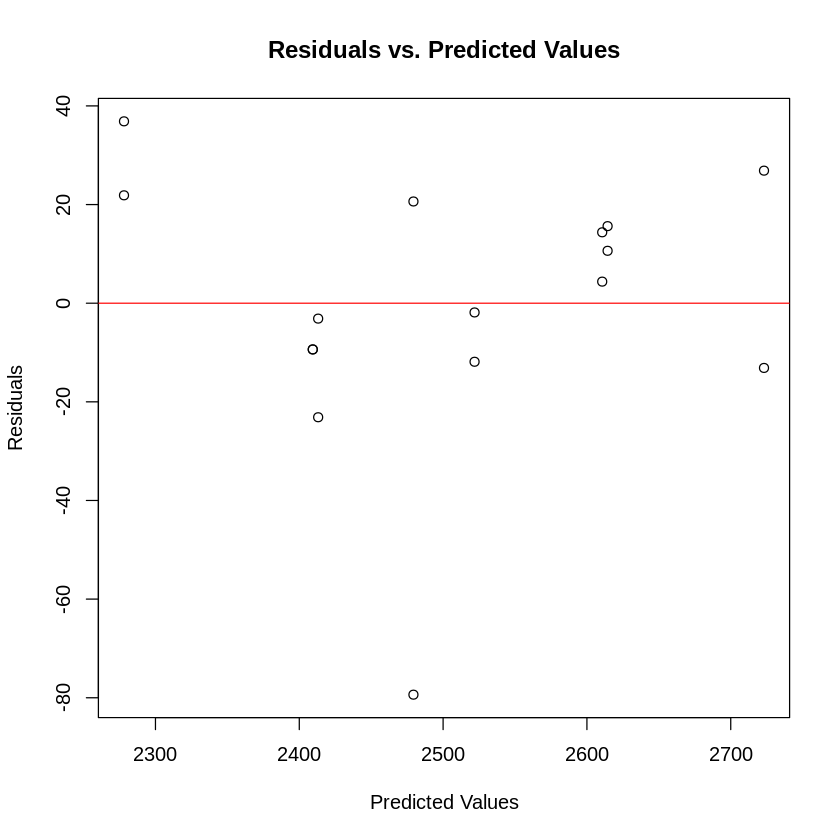

In [21]:
# Normal Probability Plot of Residuals
qqnorm(residuals(model_weight_reg))
qqline(residuals(model_weight_reg))

# Residuals vs. Predicted Values Plot
plot(fitted(model_weight_reg), residuals(model_weight_reg),
     xlab = "Predicted Values", ylab = "Residuals",
     main = "Residuals vs. Predicted Values")
abline(h = 0, col = "red")

There is one outlier that should be investigated.



5.  Repeat parts 1.--4. using the viscosity response.

In [22]:
m_viscosity <- m
m_viscosity <- add.response(m_viscosity,Viscosity)

response.names(m_viscosity)
m_viscosity

[1] "Viscosity"

,A,B,C,D,Viscosity
,<fct>,<fct>,<fct>,<fct>,<int>
1,-1,-1,-1,-1,1400
2,1,-1,-1,-1,1500
3,-1,1,-1,-1,1520
4,1,1,-1,-1,1630
5,-1,-1,1,-1,1380
6,1,-1,1,-1,1525
7,-1,1,1,-1,1500
8,1,1,1,-1,1620
9,-1,-1,-1,1,1400


In [23]:
lm_coeffs_2 <- lm(Viscosity ~ A * B * C * D - A:B:C:D, data=m_full)
effects_2 <-as.data.frame(2*lm_coeffs_2$coefficients)
names(effects_2)[1] <- 'Effects'
print(effects_2)

            Effects
(Intercept) 3001.25
A1            96.25
B1            91.25
C1             7.50
D1           -17.50
A1:B1        -13.75
A1:C1         12.50
B1:C1         10.00
A1:D1        -22.50
B1:D1        -25.00
C1:D1         13.75
A1:B1:C1      15.00
A1:B1:D1     -10.00
A1:C1:D1      -1.25
B1:C1:D1      18.75


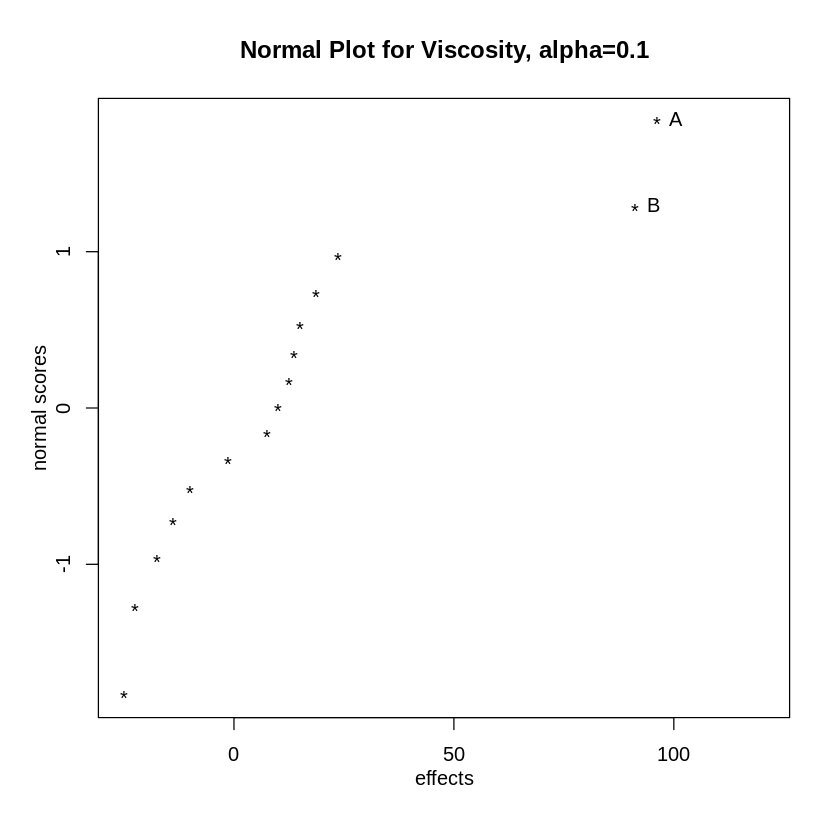

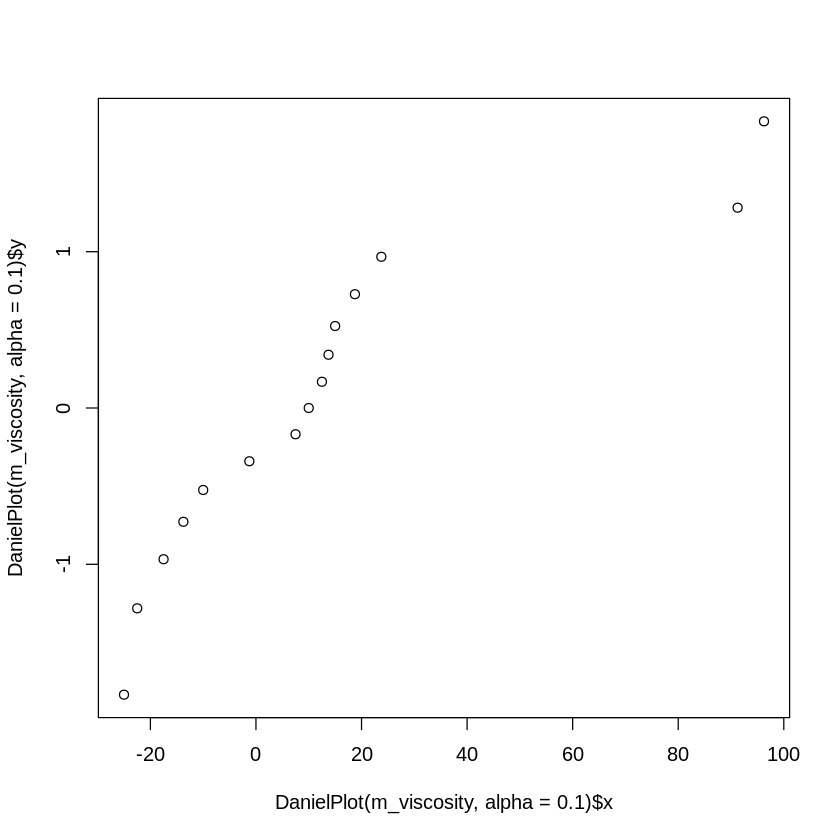

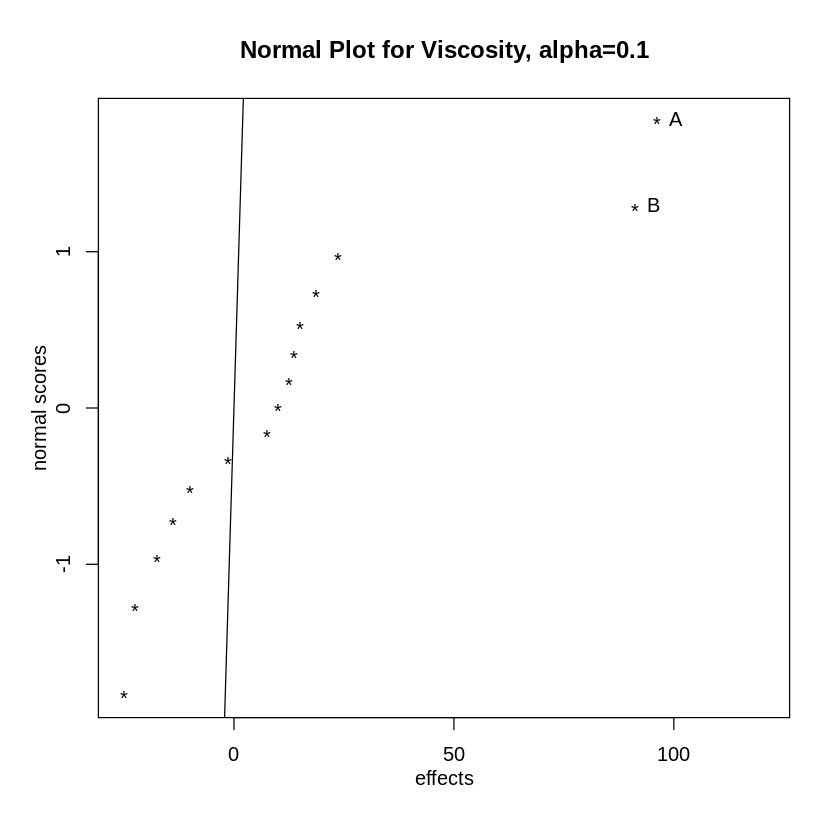

In [24]:
# Daniel plot
qqplot(DanielPlot(m_viscosity,alpha=0.1)$x,DanielPlot(m_viscosity, alpha=0.1)$y)
qqline(DanielPlot(m_viscosity,alpha=0.1)$y)

The interactions A, B appear to be important.

In [25]:
summary(aov(Viscosity ~ A + B, data = m_full))

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  37056   37056   35.73 4.61e-05 ***
B            1  33306   33306   32.12 7.70e-05 ***
Residuals   13  13481    1037                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

It confirms the result from the first part that A and B are significant.

In [26]:
model_viscosity_reg <- lm(Viscosity ~ A + B, data=m_full)
summary(model_viscosity_reg)


Call:
lm.default(formula = Viscosity ~ A + B, data = m_full)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.375  -6.875   1.875  21.875  35.625 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1500.625      8.051 186.397  < 2e-16 ***
A1            48.125      8.051   5.978 4.61e-05 ***
B1            45.625      8.051   5.667 7.70e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.2 on 13 degrees of freedom
Multiple R-squared:  0.8392,	Adjusted R-squared:  0.8145 
F-statistic: 33.93 on 2 and 13 DF,  p-value: 6.929e-06


As a result: viscosity = 1500.625 + 48.125\*A + 45.625\*B.

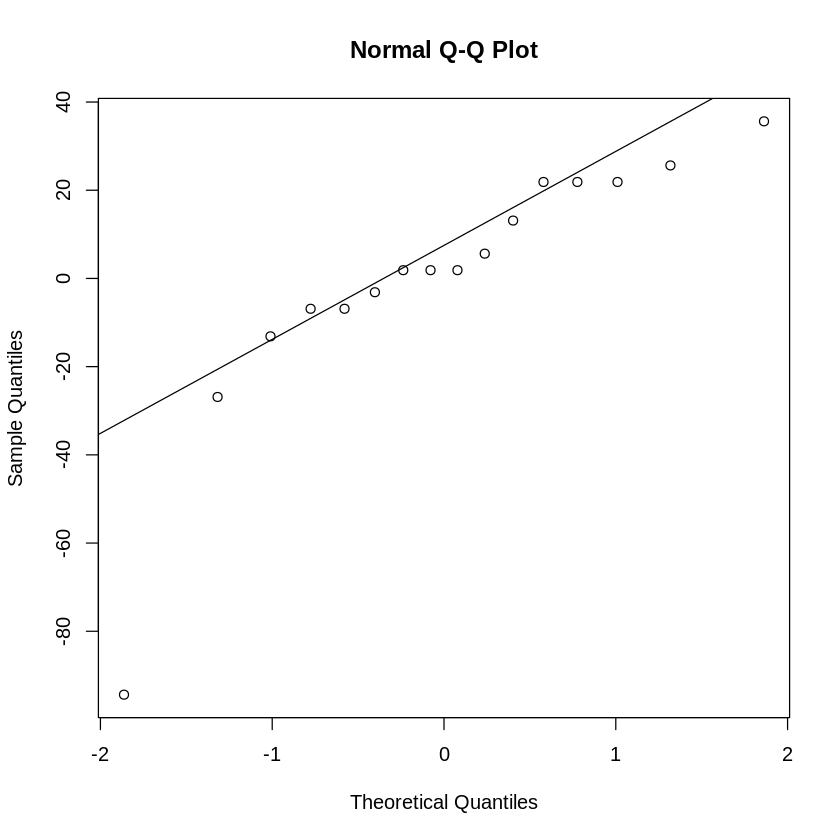

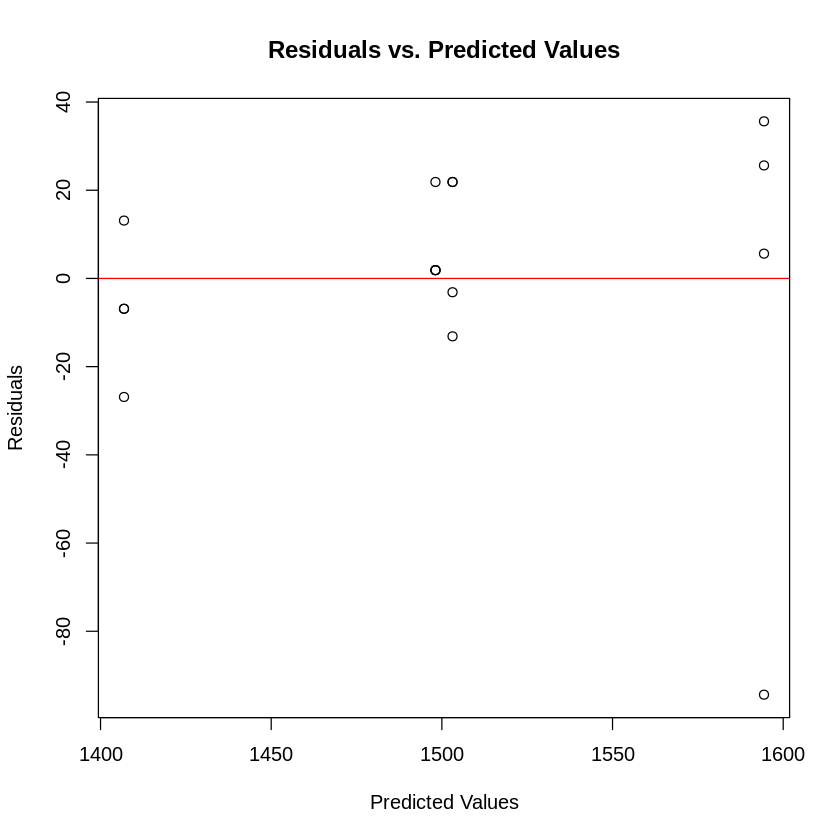

In [27]:
# Normal Probability Plot of Residuals
qqnorm(residuals(model_viscosity_reg))
qqline(residuals(model_viscosity_reg))

# Residuals vs. Predicted Values Plot
plot(fitted(model_viscosity_reg), residuals(model_viscosity_reg),
     xlab = "Predicted Values", ylab = "Residuals",
     main = "Residuals vs. Predicted Values")
abline(h = 0, col = "red")

There is one outlier that should be investigated.




Use the regression models for molecular weight and viscosity to answer
the following questions.

6.  Construct a response surface contour plot for molecular weight. In
    what direction would you adjust therocess variables to increase
    molecular weight?

7.  Construct a response surface contour plot for viscosity. In what
    direction would you adjust the process variables to decrease
    viscosity?

In [28]:
data <- df631[-c(17,18,19,20),]
data

,Temperature,Concentration,Time,Pressure,Weight,Viscosity
,<int>,<int>,<int>,<dbl>,<int>,<int>
1,100,4,20,60,2400,1400
2,120,4,20,60,2410,1500
3,100,8,20,60,2315,1520
4,120,8,20,60,2510,1630
5,100,4,30,60,2615,1380
6,120,4,30,60,2625,1525
7,100,8,30,60,2400,1500
8,120,8,30,60,2750,1620
9,100,4,20,75,2400,1400


In [29]:
p.lm1 <- lm(Weight ~ Temperature + Concentration + Time + Temperature:Concentration, data = data)
p.lm2 <- lm(Viscosity ~ Temperature + Concentration, data = data)

In [30]:
p.tmp <- list(Temperature = seq(100, 120, by=1), Concentration = seq(4, 8, by = 1))
p.new.data <- expand.grid(p.tmp)
p.new.data$Time <- 24
p.new.data$fit <- predict(p.lm1, p.new.data)

p.new.data2 <- p.new.data
p.new.data2$fit <- predict(p.lm2, p.new.data)
p.new.data$response = "Weight"
p.new.data2$response = "Viscosity"
p.data = rbind(p.new.data, p.new.data2)

p.new.data3 <- p.new.data2 %>%
  mutate(fit2 = predict(p.lm1, p.new.data)) %>%
  dplyr::select(-response) %>%
  dplyr::rename(Viscosity = fit,
        Weight = fit2)

p.new.data3

Temperature,Concentration,Time,Viscosity,Weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,4,24,1406.875,2489.875
101,4,24,1411.688,2490.062
102,4,24,1416.500,2490.250
103,4,24,1421.312,2490.437
104,4,24,1426.125,2490.625
105,4,24,1430.938,2490.812
106,4,24,1435.750,2491.000
107,4,24,1440.562,2491.188
108,4,24,1445.375,2491.375


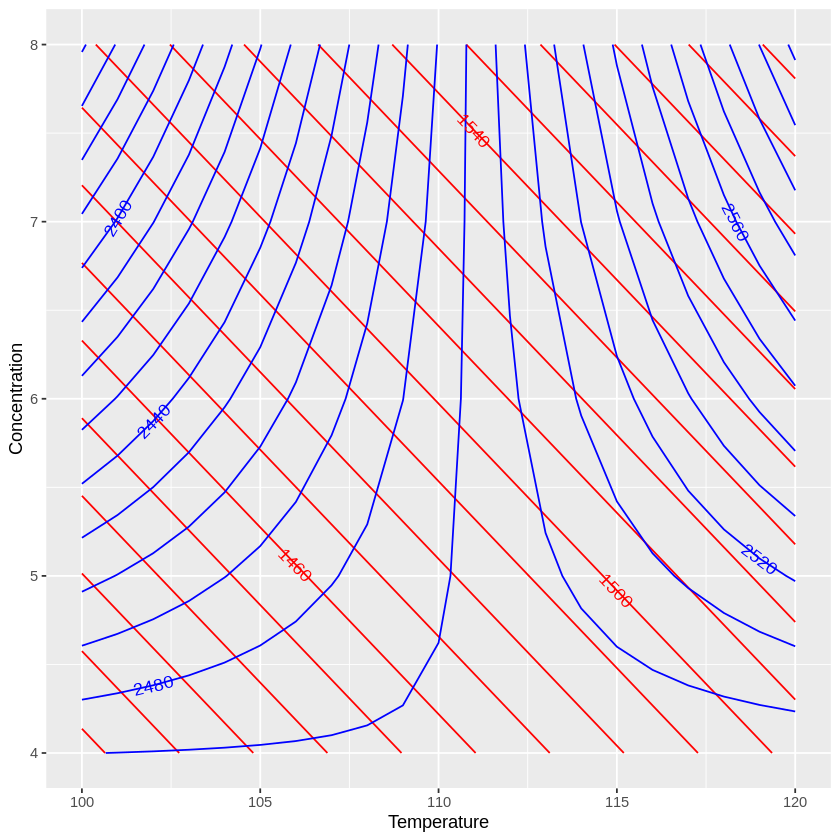

In [31]:
g <-ggplot(p.new.data3, aes(Temperature, Concentration)) +
  geom_contour(aes(z = Viscosity), col = "red", binwidth = 10) +
  geom_contour(aes(z = Weight), col = "blue", binwidth = 10) +
  geom_text_contour(aes(z = Viscosity), col = "red") +
  geom_text_contour(aes(z = Weight), col = "blue")
g

Blue = Weight: To increase molecular weight I would increase the
temperature, catalyst concentration and time. Red = Viscosity: To
decrease viscosity I would decrease the temperature and catalyst
concentration.




8.  What operating conditions would you recommend if it was necessary to
    produce a product with molecular weight between 2400 and 2500 and
    the lowest possible viscosity?

In [32]:
filtered_data <- p.new.data3 %>%
  filter(Weight >= 2400, Weight <= 2500) %>%
  filter(Viscosity == min(Viscosity))

recommended_conditions <- filtered_data %>%
  dplyr::select(Temperature, Concentration, Time, Weight, Viscosity)

print(recommended_conditions)

  Temperature Concentration Time   Weight Viscosity
1         100             4   24 2489.875  1406.875
